In [1]:
from Configuration import Editor

import Transform.Schedule

with Editor('Config') as Config:
    Config.Random.Seed = 4
    Config.Random.cuDNN.Deterministic = True
    Config.Random.cuDNN.Benchmark = True
    #prepare dataset before training
    
    Config.Dataset.ImagesRootPath = r'D:\Dataset_Collection\Cardiac_Catheterization\train\images'
    Config.Dataset.MasksRootPath = r'D:\Dataset_Collection\Cardiac_Catheterization\train\masks'
    
    Config.Dataset.IO.OutputRGBImage = False
    Config.Dataset.IO.NumWorkers = 0
    Config.Dataset.IO.PinMemory = False
    Config.Dataset.IO.PrefetchFactor = 2
    
    Config.Dataset.Preprocess.Version = 'v1'
    #train dataset
    Config.Dataset.Train.BatchSize = None
    Config.Dataset.Train.Transform.Combination.Version = 'v1'
    Config.Dataset.Train.Transform.Schedule = 0.8
    Config.Dataset.Train.Transform.Combination.Components = 'default'
    Config.Dataset.Train.Transform.Combination.Params = 'default'
    Config.Dataset.Train.Transform.Combination.Schedules = 'default'
    #validation dataset
    Config.Dataset.Validation.BatchSize = None
    Config.Dataset.Validation.Ratio = 3
    Config.Dataset.Validation.Transform.Combination.Version = 'v1'
    Config.Dataset.Validation.Transform.Schedule = 0.8
    Config.Dataset.Validation.Transform.Combination.Components = 'default'
    Config.Dataset.Validation.Transform.Combination.Params = 'default'
    Config.Dataset.Validation.Transform.Combination.Schedules = 'default'
    
    Config.Model.Class = object
    Config.Model.HyperParam = {}
    Config.Model.Load.Path = None
    Config.Model.Load.FileName = ''
    Config.Model.Load.PretrainedModel.OverWriteHyperParams = True
    Config.Model.Load.PretrainedModel.OverWriteStateDict = True
    
    Config.Training.ResumeCheckPoint = False
    Config.Training.
    Config.Training.LoadStateDict.Optimizer = False
    Config.Training.LoadStateDict.Loss = False
    
    
    
    Config.Training.Attempts = 2
    Config.Training.Epochs = 3
    Config.Training.GradientAccumulation = 1
    
#     Config.Training.Loss.Class = object
#     Config.Training.Loss.Param = {}
    
#     Config.Training.Schedule.Class = object
#     Config.Training.Schedule.Param = {}
    
#     Config.Training.Optimizer.Class = 
#     Config.Training.Optimizer.Param = {'lr':0.0005}
    
    
#     Config.Callback.ModelSavePath = ''
#     Config.Callback.WeightsSavePath = ''
    
#     Config.Logging.ProjectName = 'model_1 demo'
#     Config.Logging.ModelName = 'model_1'
#     Config.Logging.TrialCount = 2
#     Config.Logging.Comment = 'change Optimizer, Loss function'
#     Config.Logging.Purpose = ''
#     Config.Logging.Note = 'the'


In [ ]:
from torchvision import models
import segmentation_models_pytorch as smp


# (Boolean)是否依照設定路徑，載入完整客製(模型+權重)
LOAD_MODEL = False

# (Model)使用客制模型，None則使用基本模型
CUSTOM_MODEL = None
if CUSTOM_MODEL is None:
    # https://github.com/qubvel/segmentation_models.pytorch
    # (Boolean)使用smp模型，如為False則使用基礎Pytorch模型
    SMP_MODEL = True
    if SMP_MODEL:
        # (Model)建立SMP模型
        BASE_MODEL = smp.Unet
        
        # (String)建立SMP模型編碼器
        BASE_MODEL_ENCODER = "efficientnet-b0"
        
        # (String)SMP編碼器預訓練權重為 imagenet
        ENCODER_WEIGHTS = "imagenet"
        
        # (Int)模型輸入通道（1個用於灰度圖像，3個用於RGB等）
        IN_CHANNELS = 3
        
        # (String)SMP最終卷積後應用的激活函數 None
        SMP_MODEL_ACTIVATION = None
    else:
        # (Model)建立Pytorch模型
        BASE_MODEL = models.segmentation.fcn_resnet50
        
# (Boolean)是否載入權重，否則重訓
LOAD_WEIGHTS = False

# (Boolean)模型是否增加TOP層
INCULDE_TOP = True

# (String)模型主分類器
MODEL_CLASSIFIER = nn.Conv2d(512, CLASSES, kernel_size = 1, stride = 1)
        
# (String)模型輔助分類器
MODEL_AUX_CLASSIFIER = nn.Conv2d(256, CLASSES, kernel_size = 1, stride = 1)

# (Boolean)是否印出完整模型
MODEL_PRINT = False

In [ ]:
class build_model(nn.Module):

    def __init__(self):
        super().__init__()

        if LOAD_MODEL:
            # 載入預訓練模型
            self.model = torch.load(LOAD_MODEL_PATH)
        elif CUSTOM_MODEL is not None:
            # 載入模型架構
            self.model = CUSTOM_MODEL
        elif SMP_MODEL:
            self.model = BASE_MODEL(encoder_name = BASE_MODEL_ENCODER, 
                                    encoder_weights = ENCODER_WEIGHTS, 
                                    in_channels = IN_CHANNELS, 
                                    classes = CLASSES, 
                                    activation = SMP_MODEL_ACTIVATION)
        else:
            self.model = BASE_MODEL(pretrained = LOAD_WEIGHTS)

        if not LOAD_WEIGHTS:
            for param in self.model.parameters():
                param.requires_grad = False

        if INCULDE_TOP:
            self.model.classifier[4] = MODEL_CLASSIFIER
            self.model.aux_classifier[4] = MODEL_AUX_CLASSIFIER
            
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
ModelClass = Config.Model.Class

if Config.Model.Load.Path is not None:
    load_path = pathlib.Path(Config.Model.Load.Path).joinpath(Config.Model.Load.FileName)
    load_model_state = torch.load(load_path)
    if Config.Model.Load.PretrainedModel.OverWriteHyperParams:
        Config.Model.HyperParam.update(load_model_state['hyperparam'])
    
model = ModelClass(**Config.Model.HyperParam)
if Config.Model.Load.PretrainedModel.OverWriteStateDict:
    model.load_state_dict(load_model_state['state_dict'])
    
optimizer


In [2]:
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.optim import lr_scheduler
from torch.cuda.amp import autocast, GradScaler
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import models

import segmentation_models_pytorch as smp

===============attempt 0==================
==========epoch 0=============
=====Train=====


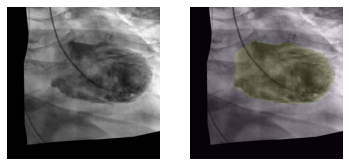

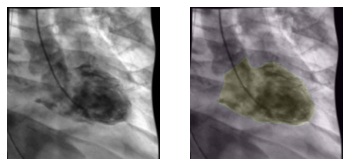

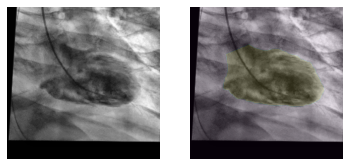

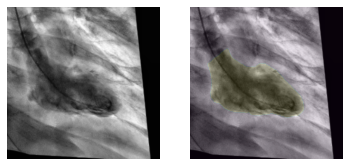

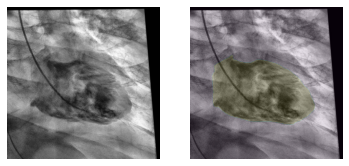

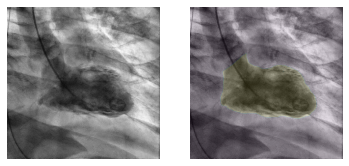

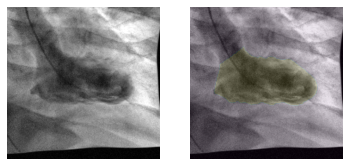

=====Validation=====


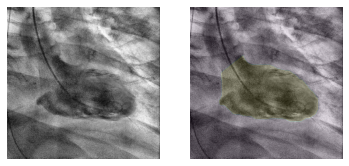

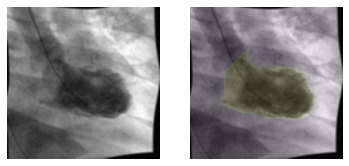

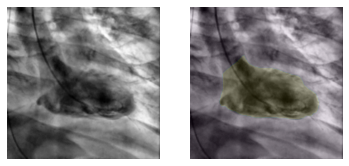

==========epoch 1=============
=====Train=====


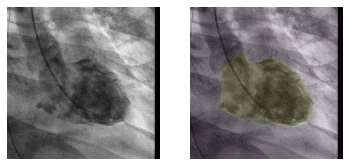

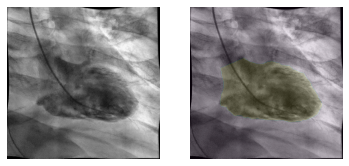

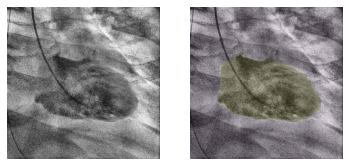

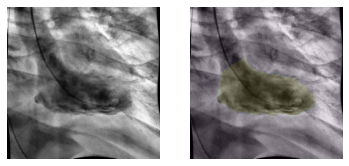

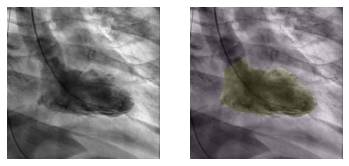

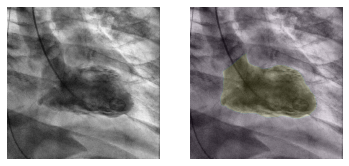

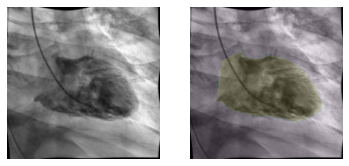

=====Validation=====


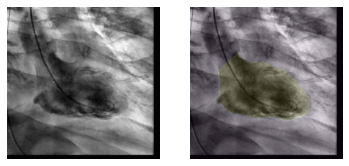

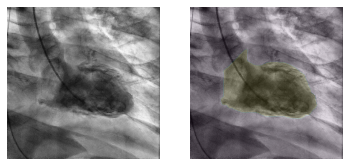

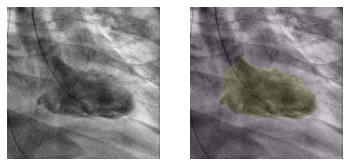

==========epoch 2=============
=====Train=====


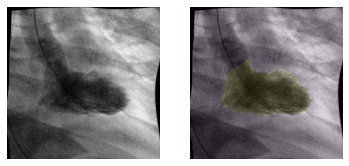

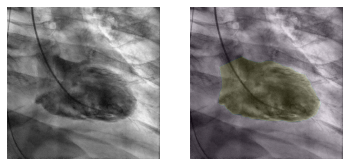

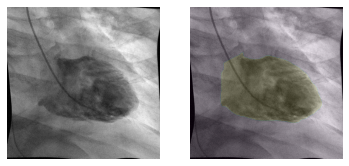

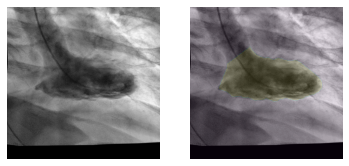

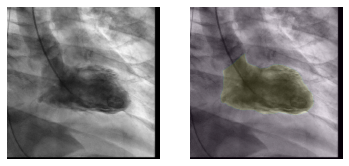

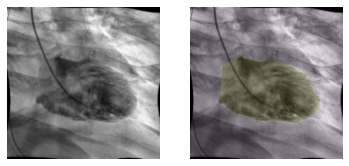

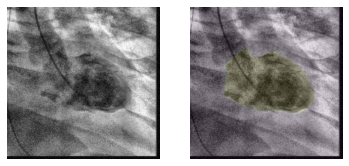

=====Validation=====


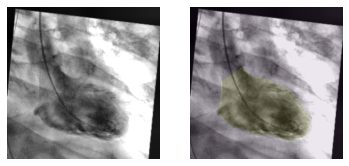

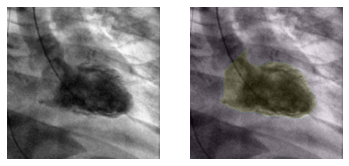

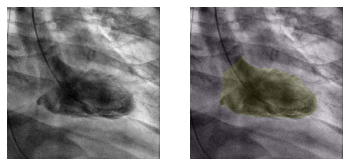

===============attempt 1==================
==========epoch 0=============
=====Train=====


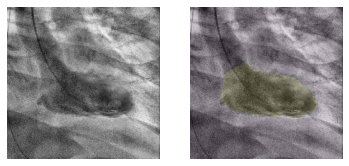

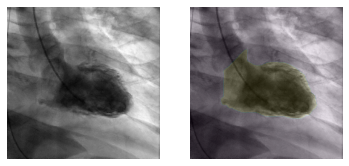

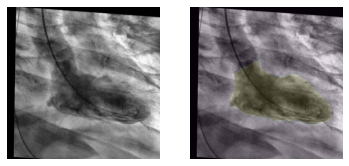

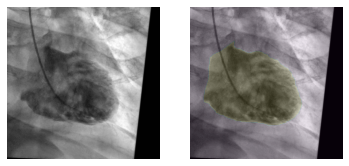

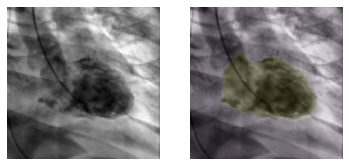

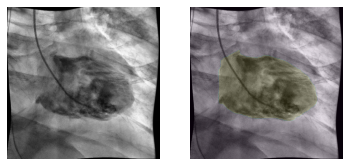

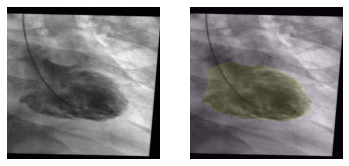

=====Validation=====


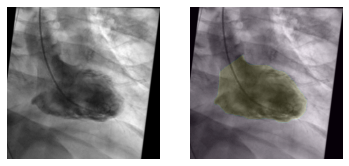

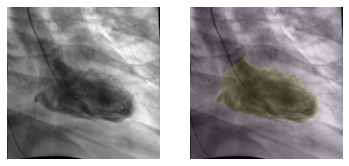

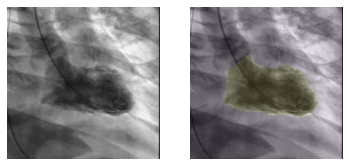

==========epoch 1=============
=====Train=====


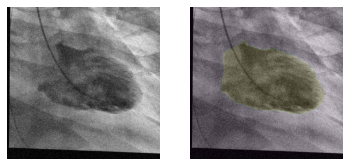

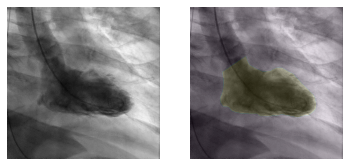

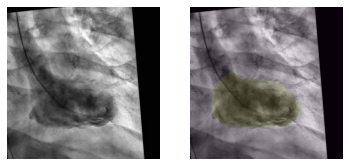

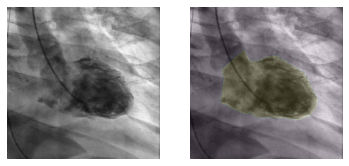

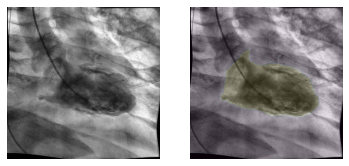

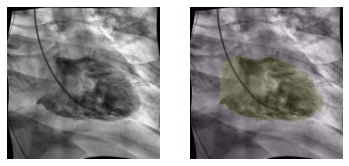

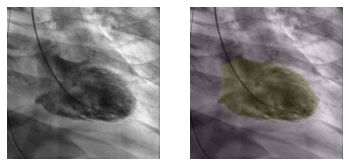

=====Validation=====


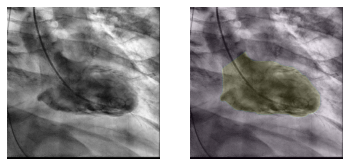

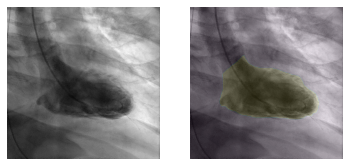

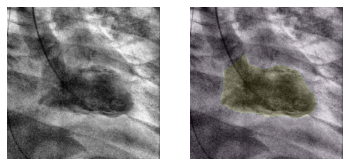

==========epoch 2=============
=====Train=====


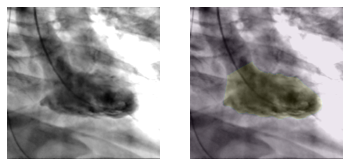

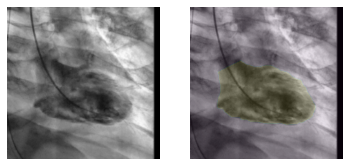

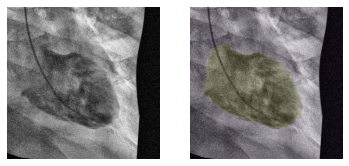

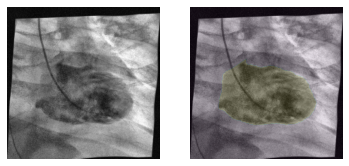

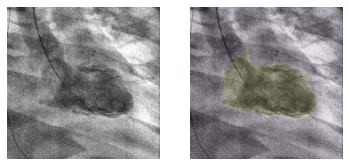

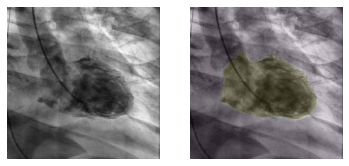

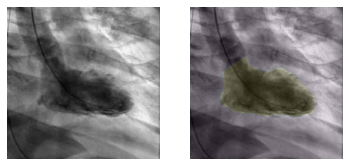

=====Validation=====


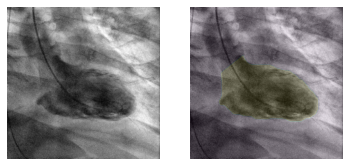

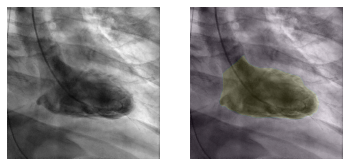

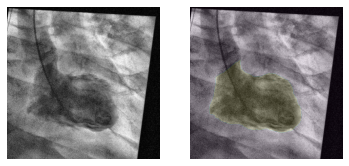

In [3]:
import numpy as np
import os
import random
import torch

from Dataset import TrainDataLoader
import Configuration

import Transform.Preprocess
import Transform.Combinations
import Transform.Schedule




Config = Configuration.Config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seed = Config.Random.Seed
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = Config.Random.cuDNN.Deterministic
torch.backends.cudnn.benchmark = Config.Random.cuDNN.Benchmark

train_transform_creater = getattr(Transform.Combinations, Config.Dataset.Train.Transform.Combination.Version)
train_transform_creater = train_transform_creater(
    Config.Dataset.Train.Transform.Schedule,
    Config.Dataset.Train.Transform.Combination.Components,
    Config.Dataset.Train.Transform.Combination.Params,
    Config.Dataset.Train.Transform.Combination.Schedules)

validation_transform_creater = getattr(Transform.Combinations, Config.Dataset.Validation.Transform.Combination.Version)
validation_transform_creater = validation_transform_creater(
    Config.Dataset.Validation.Transform.Schedule,
    Config.Dataset.Validation.Transform.Combination.Components,
    Config.Dataset.Validation.Transform.Combination.Params,
    Config.Dataset.Validation.Transform.Combination.Schedules)

preprocess = getattr(Transform.Preprocess,Config.Dataset.Preprocess.Version)

dataloader = TrainDataLoader(
    images_root = Config.Dataset.ImagesRootPath,
    masks_root = Config.Dataset.MasksRootPath,
    train_transform = train_transform_creater,
    train_batch_size = Config.Dataset.Train.BatchSize,
    validation_ratio = Config.Dataset.Validation.Ratio,
    validation_transform = validation_transform_creater,
    validation_batch_size = Config.Dataset.Validation.BatchSize,
    image_rgb = Config.Dataset.IO.OutputRGBImage,
    preprocess = preprocess,
    num_workers = Config.Dataset.IO.NumWorkers,
    pin_memory = Config.Dataset.IO.PinMemory,
    prefetch_factor = Config.Dataset.IO.PrefetchFactor)

for attempt in range(Config.Training.Attempts):
    train_dataset, validation_dataset = dataloader.get_dataset()
    print(f'===============attempt {attempt}==================')

#     model = build_new_model(seed)
    for epoch in range(Config.Training.Epochs):
        print(f'==========epoch {epoch}=============')

        print('=====Train=====')
        for batch_train_data in train_dataset(epoch):
            image,mask = batch_train_data
            image = image[0]
            plt.figure()
            plt.subplot(1,2,1)
            plt.imshow(image,cmap = 'gray')
            plt.axis('off')
            plt.subplot(1,2,2)
            plt.imshow(image,cmap = 'gray')
            plt.imshow(mask,alpha=0.1)
            plt.axis('off')
            plt.show()

        print('=====Validation=====')
        for batch_validation_data in validation_dataset(epoch):
            image,mask = batch_validation_data
            image = image[0]
            plt.figure()
            plt.subplot(1,2,1)
            plt.imshow(image,cmap = 'gray')
            plt.axis('off')
            plt.subplot(1,2,2)
            plt.imshow(image,cmap = 'gray')
            plt.imshow(mask,alpha=0.1)
            plt.axis('off')
            plt.show()


In [7]:
import torch
from torch import nn,optim

In [8]:
# Define model
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [11]:
# Define model
class TheModelClass2(nn.Module):
    def __init__(self):
        super(TheModelClass2, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
model2 = TheModelClass()

# Initialize optimizer
optimizer2 = optim.SGD(model2.parameters(), lr=0.1, momentum=0.5)
optimizer2.load_state_dict(optimizer.state_dict())

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model2.state_dict():
    print(param_tensor, "\t", model2.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer2.state_dict():
    print(var_name, "\t", optimizer2.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]
